In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\Kavya\OneDrive\Documents\Data sets\train_LZdllcl.csv')

In [3]:
df = pd.read_csv(r'C:\Users\Kavya\OneDrive\Documents\Data sets\test_2umaH9m.csv')

In [4]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [5]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## Data Preprocessing

In [7]:
# Splitting numerical and categorical columns

num_data = data.select_dtypes(include = ["number", "float64"])
cat_data = data.select_dtypes(include = "object")

num_cols = num_data.columns.tolist()
cat_cols = cat_data.columns.tolist()

print("numerical columns: ", num_cols)
print("categorical columns: ",cat_cols)

numerical columns:  ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
categorical columns:  ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [8]:
# Filling missing values for numerical cols with median
# Filling missing values for categorical cols with mode

for col in num_cols:
    num_data[col] = num_data[col].fillna(num_data[col].median())

for col in cat_cols:
    print(cat_data[col].mode())

for col in cat_cols:
    cat_data[col] = cat_data[col].fillna(cat_data[col].mode())

# Rearranging data

data = pd.concat([num_data, cat_data], axis = 1)

0    Sales & Marketing
Name: department, dtype: object
0    region_2
Name: region, dtype: object
0    Bachelor's
Name: education, dtype: object
0    m
Name: gender, dtype: object
0    other
Name: recruitment_channel, dtype: object


In [9]:
data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,65438,1,35,5.0,8,1,0,49,0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,65141,1,30,5.0,4,0,0,60,0,Operations,region_22,Bachelor's,m,other
2,7513,1,34,3.0,7,0,0,50,0,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,2542,2,39,1.0,10,0,0,50,0,Sales & Marketing,region_23,Bachelor's,m,other
4,48945,1,45,3.0,2,0,0,73,0,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0,Technology,region_14,Bachelor's,m,sourcing
54804,74592,1,37,2.0,6,0,0,56,0,Operations,region_27,Master's & above,f,other
54805,13918,1,27,5.0,3,1,0,79,0,Analytics,region_1,Bachelor's,m,other
54806,13614,1,29,1.0,2,0,0,45,0,Sales & Marketing,region_9,NaN,m,sourcing


In [10]:
data.isna().sum()

employee_id                0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
dtype: int64

In [11]:
data = pd.concat([num_data, cat_data], axis = 1)

# Handling 'education' (if necessary)
if data['education'].isnull().any():  # Check for missing values
    mode_value = data['education'].mode()[0]  # Get mode
    data['education'] = data['education'].fillna(mode_value)

In [12]:
data['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

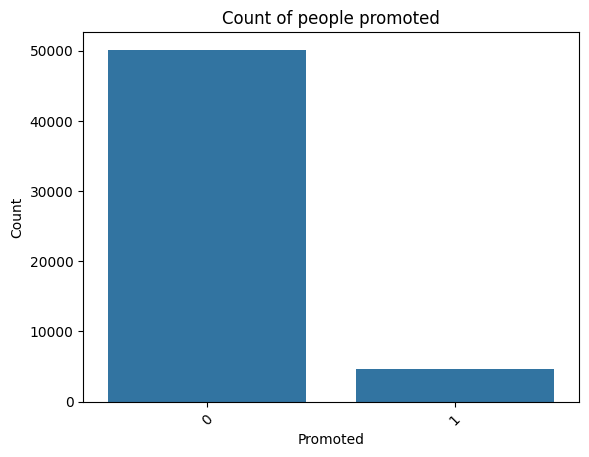

In [14]:
# Plot class imbalance
sns.countplot(x ='is_promoted', data = data)
plt.title ('Count of people promoted')
plt.xlabel('Promoted')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [15]:
# Handling class imbalance
from imblearn.over_sampling import RandomOverSampler

X= data.drop('is_promoted', axis = 1)
y = data['is_promoted']

oversampler = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = oversampler.fit_resample(X,y)

is_promoted
0    50140
1    50140
Name: count, dtype: int64


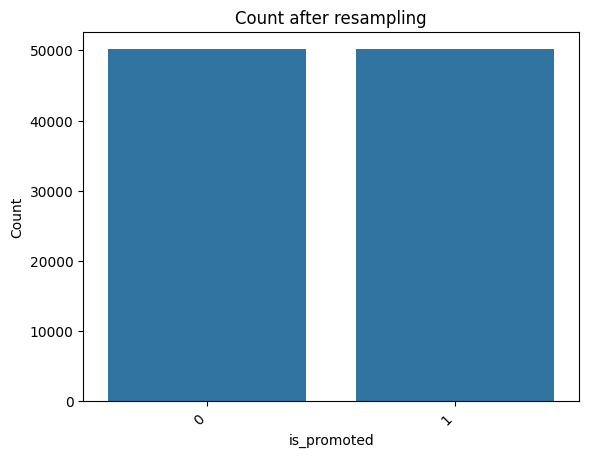

In [16]:
# Create a new balanced DataFrame
balanced_data = pd.DataFrame(X_resampled, columns = X.columns)
balanced_data['is_promoted'] = y_resampled

# Check the class distribution after resampling
print(balanced_data['is_promoted'].value_counts())

sns.countplot(x = 'is_promoted', data = balanced_data)
plt.title('Count after resampling')
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha ='right')
plt.show()

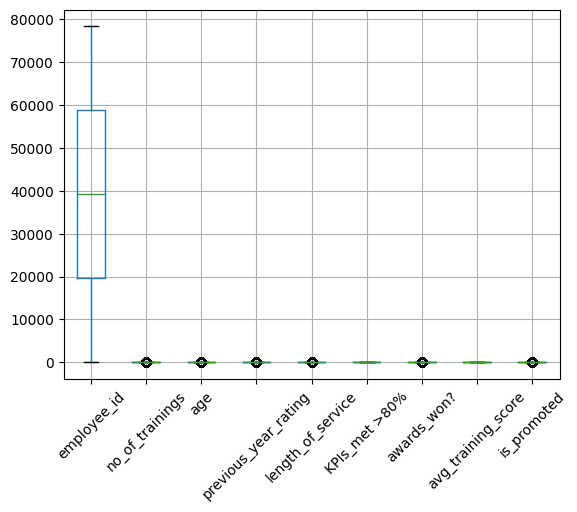

In [17]:
# Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).
num_data.boxplot()
plt.xticks(rotation=45)
plt.show()

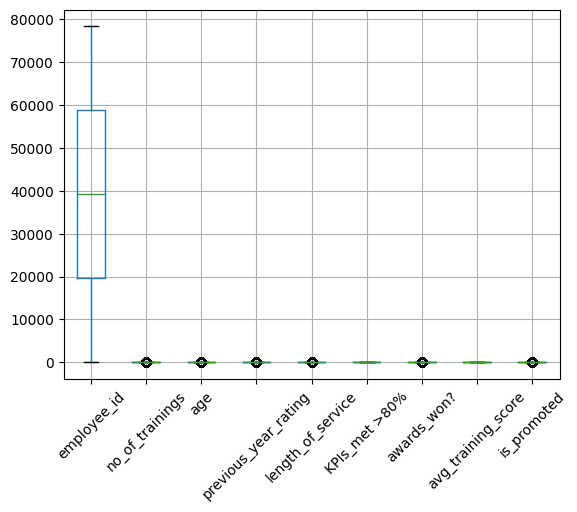

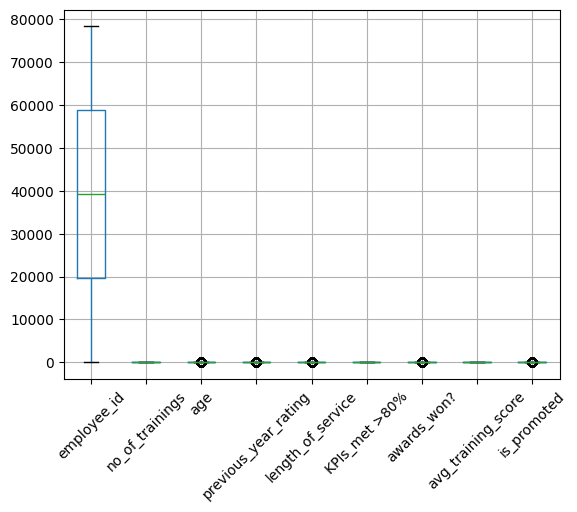

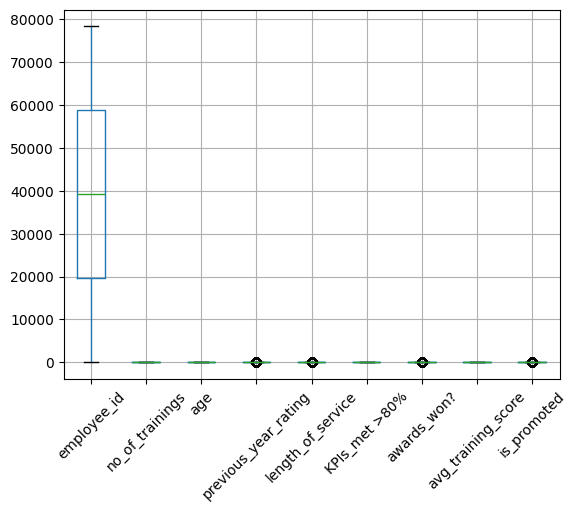

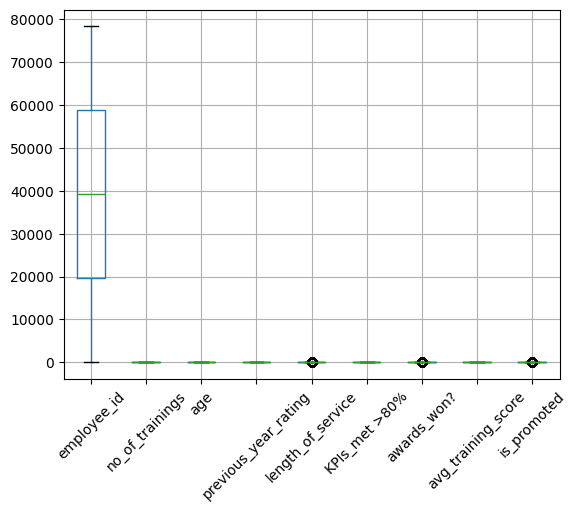

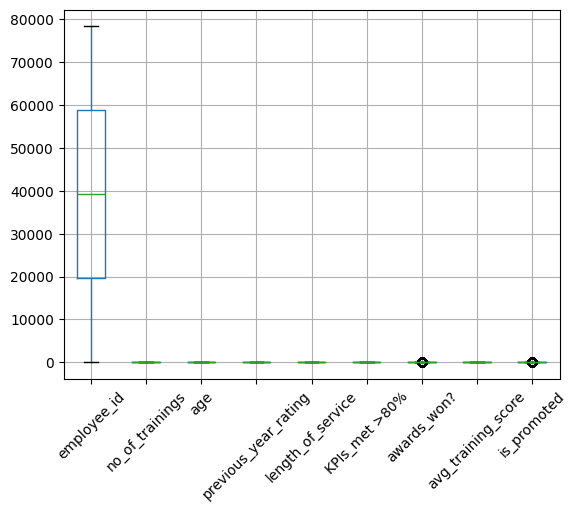

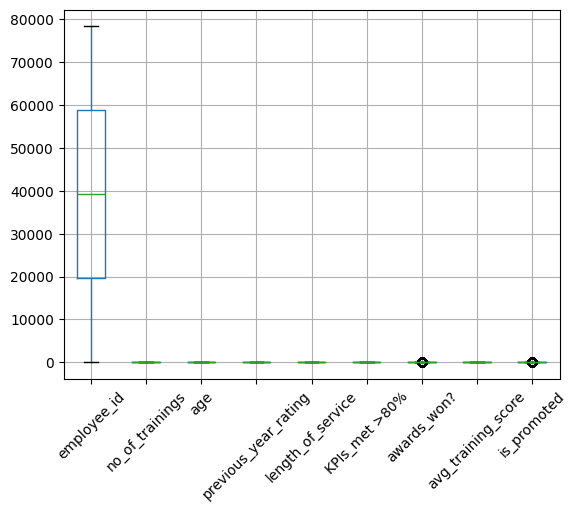

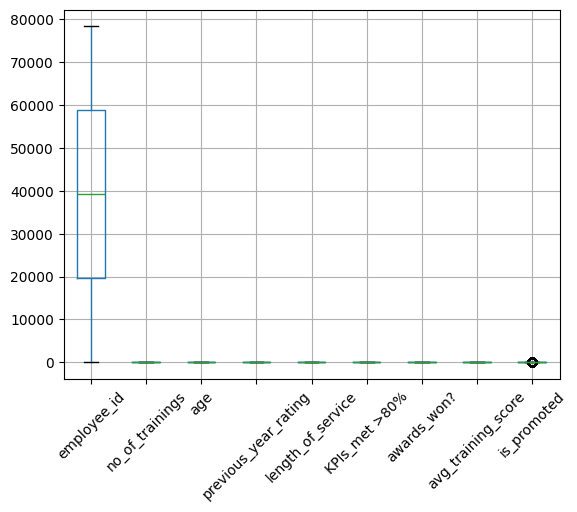

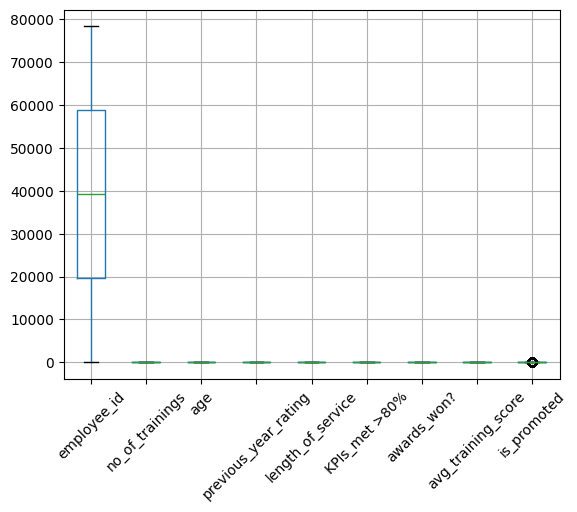

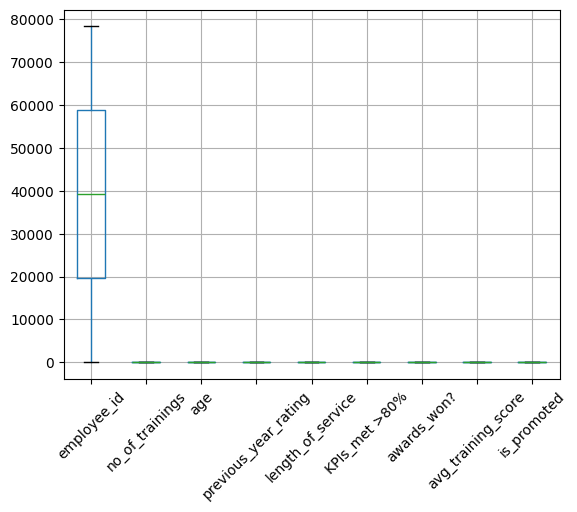

In [18]:
# Remove outliers from these features if they are not representative of typical house prices.

def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[column_name] = data[column_name].clip(upper = upper_bound)
    data[column_name] = data[column_name].clip(lower = lower_bound)
    return data[column_name]




for col in num_cols:
      num_data[col] = remove_outliers(num_data, col)
      num_data.boxplot()
      plt.xticks(rotation=45)
      plt.show()

In [19]:
data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,65438,1,35,5.0,8,1,0,49,0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,65141,1,30,5.0,4,0,0,60,0,Operations,region_22,Bachelor's,m,other
2,7513,1,34,3.0,7,0,0,50,0,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,2542,2,39,1.0,10,0,0,50,0,Sales & Marketing,region_23,Bachelor's,m,other
4,48945,1,45,3.0,2,0,0,73,0,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0,Technology,region_14,Bachelor's,m,sourcing
54804,74592,1,37,2.0,6,0,0,56,0,Operations,region_27,Master's & above,f,other
54805,13918,1,27,5.0,3,1,0,79,0,Analytics,region_1,Bachelor's,m,other
54806,13614,1,29,1.0,2,0,0,45,0,Sales & Marketing,region_9,Bachelor's,m,sourcing


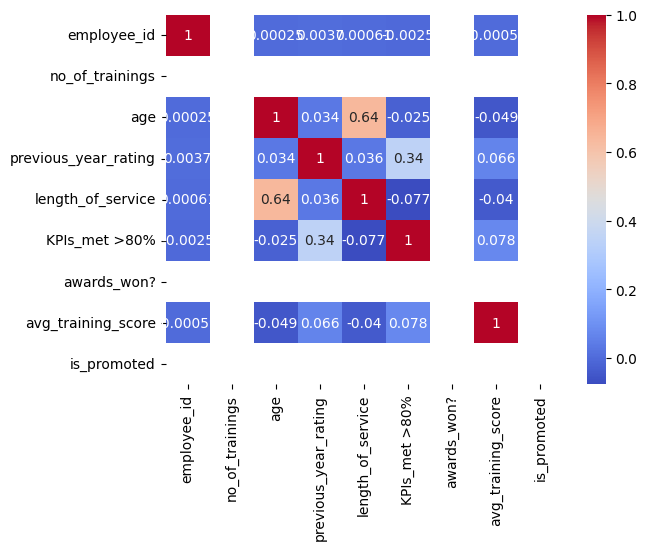

                      employee_id  no_of_trainings       age  \
employee_id              1.000000              NaN  0.000254   
no_of_trainings               NaN              NaN       NaN   
age                      0.000254              NaN  1.000000   
previous_year_rating     0.003669              NaN  0.033864   
length_of_service        0.000612              NaN  0.640451   
KPIs_met >80%           -0.002501              NaN -0.025006   
awards_won?                   NaN              NaN       NaN   
avg_training_score      -0.000586              NaN -0.049246   
is_promoted                   NaN              NaN       NaN   

                      previous_year_rating  length_of_service  KPIs_met >80%  \
employee_id                       0.003669           0.000612      -0.002501   
no_of_trainings                        NaN                NaN            NaN   
age                               0.033864           0.640451      -0.025006   
previous_year_rating              1.000

In [20]:
sns.heatmap(num_data.corr(), annot = True, cmap = 'coolwarm')
plt.show()  

# Calculate the correlation matrix
correlation_matrix = num_data.corr()

# Print the correlation matrix
print(correlation_matrix)

In [21]:
# Identify all numerical columns (excluding the target variable ).

numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('is_promoted' )  # Remove the target variable and id
numerical_cols.remove('employee_id')
# Scale these features using technique MinMax scaling.

from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()
data[numerical_cols] = minmax_scaler.fit_transform(data[numerical_cols])

In [22]:
data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,65438,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667,0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,65141,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000,0,Operations,region_22,Bachelor's,m,other
2,7513,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333,0,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,2542,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333,0,Sales & Marketing,region_23,Bachelor's,m,other
4,48945,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667,0,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000,0,Technology,region_14,Bachelor's,m,sourcing
54804,74592,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333,0,Operations,region_27,Master's & above,f,other
54805,13918,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667,0,Analytics,region_1,Bachelor's,m,other
54806,13614,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000,0,Sales & Marketing,region_9,Bachelor's,m,sourcing


In [23]:
#Identify all categorical columns in the dataset.

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
nominal_cols = ['department', 'education', 'gender', 'recruitment_channel']
ordinal_cols = ['region']

# One-Hot Encoding for Nominal Columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for DataFrame output
encoded_nominal = encoder.fit_transform(data[nominal_cols])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=encoder.get_feature_names_out(nominal_cols))

# Label Encoding for Ordinal Columns
label_encoder = LabelEncoder() # sparse=False for DataFrame output
encoded_ordinal = encoder.fit_transform(data[ordinal_cols])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=encoder.get_feature_names_out(ordinal_cols))

# Combine Encoded Columns with Numerical Data
data = data.drop(columns=nominal_cols + ordinal_cols)  # Drop original categorical columns
data = pd.concat([data, encoded_nominal_df], axis=1)  # Add encoded columns

In [24]:
# Set aside the is_promoted column as the target variable.

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop('is_promoted', axis=1)  # Features (all columns except 'is_promoted')
y = data['is_promoted']  # Target variable ('is_promoted')

# Split the dataset into training (80%) and testing (20%) sets using the train_test_split function from sklearn
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test


X_train
X_test
y_train
y_test 

40907    0
51939    0
6978     0
12814    0
22921    0
        ..
3458     0
26056    0
29981    0
44352    0
18295    0
Name: is_promoted, Length: 10962, dtype: int64

In [25]:
data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667,0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,65141,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7513,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2542,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,48945,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667,0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000,0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,74592,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333,0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
54805,13918,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,13614,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [27]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [28]:
num_df = df.select_dtypes(include = ["number", "float64"])
cat_df = df.select_dtypes(include = "object")

num_col = num_df.columns.tolist()
cat_col = cat_df.columns.tolist()

print("numerical columns: ", num_col)
print("categorical columns: ",cat_col)

numerical columns:  ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
categorical columns:  ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [29]:
# Filling missing values for numerical cols with median
# Filling missing values for categorical cols with mode

for col in num_col:
    num_df[col] = num_df[col].fillna(num_df[col].median())

for col in cat_col:
    print(cat_df[col].mode())

for col in cat_col:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode())

# Rearranging data

df = pd.concat([num_df, cat_df], axis = 1)

0    Sales & Marketing
Name: department, dtype: object
0    region_2
Name: region, dtype: object
0    Bachelor's
Name: education, dtype: object
0    m
Name: gender, dtype: object
0    other
Name: recruitment_channel, dtype: object


In [30]:
df = pd.concat([num_df, cat_df], axis = 1)

# Handling 'education' (if necessary)
if df['education'].isnull().any():  # Check for missing values
    mode_value = df['education'].mode()[0]  # Get mode
    df['education'] = df['education'].fillna(mode_value)

In [31]:
df.isna().sum()

employee_id             0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
dtype: int64

In [32]:
#save the clean data
#training set
data.to_csv('data_cleaned.csv', index=False)

#test set
df.to_csv('test_cleaned.csv', index=False)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\Users\Kavya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [36]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9176245210727969
0.5362318840579711
0.040748898678414094
0.07574206755373593


## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
# Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree = decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)

# Generate confusion matrix for Decision Tree Classifier
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[9480  574]
 [ 500  408]]
0.9020251778872469
0.4154786150712831


## SVM

In [39]:
from sklearn.svm import SVC

In [40]:
svm_cls = SVC(kernel = 'rbf')
svm_cls = svm_cls.fit(X_train, y_train)
y_pred_svm = svm_cls.predict(X_test)

In [51]:
print(accuracy_score(y_test,y_pred_svm))
print(precision_score(y_test,y_pred_svm,zero_division=1.0))
print(recall_score(y_test,y_pred_svm))
print(f1_score(y_test,y_pred_svm))

0.9171683999270206
1.0
0.0
0.0


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(X_train, y_train)
y_pred_rf = rf_cls.predict(X_test)

In [53]:
submission1 = pd.read_csv(r'C:\Users\Kavya\OneDrive\Documents\Data sets\sample_submission_M0L0uXE.csv')

submission1

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [57]:
submission1['is_promoted'] = y_pred_rf
y_pred_rf = pd.DataFrame(y__pred_rf, columns=["is_promoted"])
submission1.to_csv("final_submission.csv", index = False)

ValueError: Length of values (10962) does not match length of index (23490)